
# Przygotowanie

Przygotowanie
Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Support Vector Machine

Jest to jeden z najbardziej rozpowszechnionych i wszechstronnych modeli uczenia maszynowego. Z jego uzyciem dokonac mozna klasyfikacji liniowej (SVC), nieliniowej jak i regresji (SVR). Na poniższej grafice przedstawione zostało działanie klasyfikatora.

![svc](svc.png)

Analizujac grafike dostrzec mozna dwie oddzielne klasy oddzielone za pomoca prostej. Widoczna linia ciagła rozdziela klasy, a przerywane linie oznaczają margines, czyli możliwe najdalsze oddalenie elementu (np. nowego) jaki zakwalifikowany
zostanie do danej klasy. Maszyny SVM czułe sa na skale danych, przed ich uzyciem zawsze powinna zostać przeprowadzona normalizacja danych (np. min-max, lub standaryzacja).

![svc_example](svc2.jpg)

Równowage pomiedzy marginesami możemy regulować za pomoca hipermarapetru
C. Mniejsze jego wartości poszerzają granice, jednocześnie wprowadzając
więcej jej naruszeń. Im margines jest szerszy, tym własciwosci generalizujace
jakie posiada klasyfikator będę większe. Mniejsza staje się podatność na przeuczenie
(ang. overfitting), ale zmniejsza się skuteczność klasyfikatora. Szukany jest
taki klasyfikator, który podzieli przestrzeń na dwa rozłaczne zbiory odpowiadajace
dwóm klasom, w możliwie optymalny sposób. Podejście opiera się na
znalezieniu granicy decyzyjnej.

Wektory nośne (Support vectors) są to obserwacje (data points), które wystepują najbliżej hiperpłaszczyzny. Punkty te, pomagają lepiej wyznaczyć linię separacji pomiędzy klasami poprzez obliczenie marginesów. Są to najbardziej znaczace obserwacje ze zbioru z punktu widzenia konstrukcji klasyfikatora.

Warto zaznaczyć, że za pomocą klasyfikatora SVC można klasyfikaować dane, które nie są linowo separowalne. Można to osiągnąć przez tzw "sztuczkę kernelową", dzięki czemu możliwe jest zmapowanie obserwacji do wielowymiarowej przestrzeni. Klasyfikator z biblioteki Sklearn posiada parametr *kernel*, który pozwala na zmianę jądra. Dodatkowo, parametr *gamma* pozwala na modyfikację działania samego kernela.

Warto zaznaczyć, że SVC dobrze nadaje się do niewielkich zbiorów danych, gdyż w przypadku dużej ilości staję się on mało wydajny.

Funkcja jaka jest minimalizowana podczas działania klasyfikatora wygląda następująco:

\begin{equation}
min C \sum^m_{i=1}[y^{(i)}cost_{1}(\theta^{T}x^{(i)}) - (1 - y^{(i)})cost_{0}(\theta^{T}x^{(i)})] + \frac{1}{2} \sum^{n}_{i=1}\theta^{2}_{j}
\end{equation}

## Zadanie 0 

Wczytanie danych ze zbioru oraz wizualizacja.

In [34]:
import pandas as pd

data_input = pd.read_csv('./Ankieta.csv')
data_input.head()

,Waga,Wzrost,Plec
0,55,160,Kobieta
1,78,180,Mezczyzna
2,55,150,Kobieta
3,99,196,Mezczyzna
4,90,180,Mezczyzna


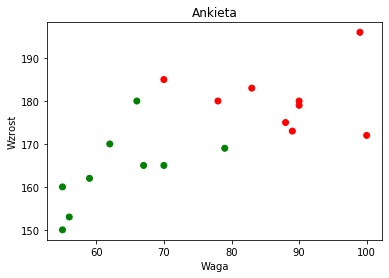

In [35]:
import matplotlib.pyplot as plt
from matplotlib import colors

x = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)
y = data_input['Waga']
z = data_input['Wzrost']

data_input['Plec'] = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)
data_input_after_normalization = data_input.copy()
plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Waga')
plt.ylabel('Wzrost')
plt.title('Ankieta')
plt.show()

C:\Users\Cinek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA496D12C8>,
      dtype=object)

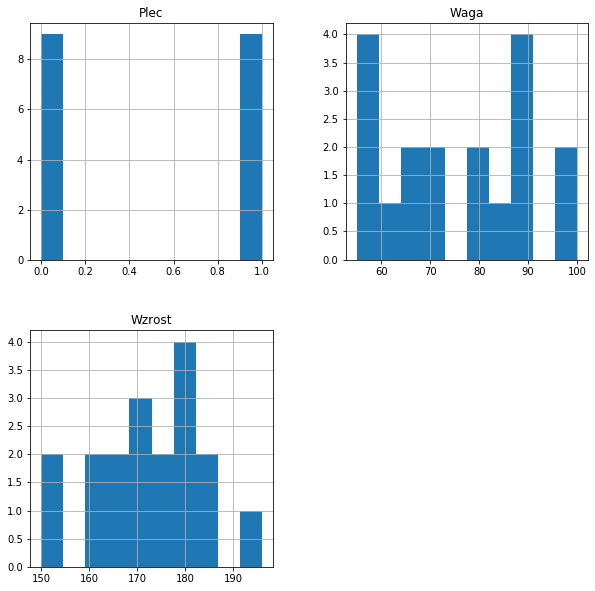

In [36]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_input.hist(ax=ax)

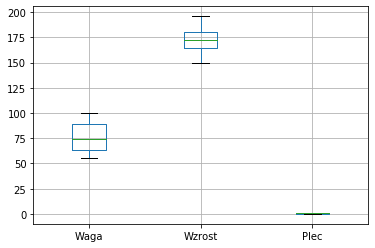

In [37]:
data_input.boxplot()

Na bazie wykresów box-plot można stwierdzić, że dane posiadają różniące się zakresy, co powoduje potrzebę ich skalowania. Warto zauważyć również, że rozkład klas w zbiorze jest równomierny (patrz: histogram)

## Zadanie 1

Proszę dokonać normalizacji zbioru danych za pomocą standaryzacji oraz narysować wykres box-plot dla wszystkich zmiennych. W jaki sposób zmieniły się dane?

        Waga    Wzrost  Plec
0   0.000000  0.217391     1
1   0.511111  0.652174     0
2   0.000000  0.000000     1
3   0.977778  1.000000     0
4   0.777778  0.652174     0
5   0.333333  0.760870     0
6   0.333333  0.326087     1
7   0.155556  0.434783     1
8   0.088889  0.260870     1
9   0.733333  0.543478     0
10  0.533333  0.413043     1
11  0.777778  0.630435     0
12  0.244444  0.652174     1
13  1.000000  0.478261     0
14  0.266667  0.326087     1
15  0.755556  0.500000     0
16  0.022222  0.065217     1
17  0.622222  0.717391     0


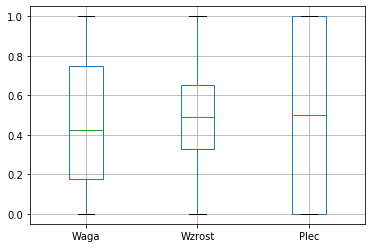

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_input_after_normalization[['Waga', 'Wzrost']] = scaler.fit_transform(data_input_after_normalization[['Waga', 'Wzrost']])
print(data_input_after_normalization)
data_input_after_normalization.boxplot()

Teraz wszystkie dane znajdują się w tym samym zakresie, co ułatwi analizę i zwiększy skuteczność SVC.

## Zadanie 2

W tym zadaniu należy dokonać podziału zbioru danych na uczący oraz testowy. Zbiór uczący będzie służył do treningu klasyfikatora, a testowy do obliczenia ostatecznej skuteczności klasyfikacji. Prosze, by 80% próbek znalazło się w zbiorze uczącym, a 20% w testowym.

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_input[['Waga', 'Wzrost']], data_input['Plec'], test_size = 0.2, random_state = 22, shuffle = True)

x_train_after, x_test_after, y_train_after, y_test_after = train_test_split(data_input_after_normalization[['Waga', 'Wzrost']], data_input_after_normalization['Plec'], test_size = 0.2, random_state = 21, shuffle = True)
print(x_train_after)
print(x_test_after)

        Waga    Wzrost
11  0.777778  0.630435
14  0.266667  0.326087
12  0.244444  0.652174
17  0.622222  0.717391
1   0.511111  0.652174
2   0.000000  0.000000
3   0.977778  1.000000
16  0.022222  0.065217
13  1.000000  0.478261
0   0.000000  0.217391
4   0.777778  0.652174
8   0.088889  0.260870
15  0.755556  0.500000
9   0.733333  0.543478
        Waga    Wzrost
10  0.533333  0.413043
6   0.333333  0.326087
7   0.155556  0.434783
5   0.333333  0.760870


## Zadanie 3

W tym zadaniu należy dokonać klasyfikacji danych za pomocą klasyfikatora SVC. Proszę obliczyć skuteczność klasyfikatora na danych po, oraz przed standaryzacją i porównać wyniki.

In [40]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd

clf = SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
compare_df = pd.DataFrame(data=y_pred,index=[str(i + 1)  
                        for i in range(len(y_pred))], columns=["y_pred"])
compare_df['y_test'] = y_test.values
compare_df['match'] = np.where((compare_df['y_test'] == compare_df['y_pred']), True, False)
print(f'Predicted and test values WITHOUT normalization\n: {compare_df}')
amount_of_true = compare_df.groupby('match').size()
correctness = (amount_of_true[True]/len(y_test)) * 100
print(f'Amount of correctly predicted WITHOUT normalization: {correctness}')

clf_after = SVC()
clf_after.fit(x_train_after, y_train_after)
y_pred_after = clf_after.predict(x_test_after)
compare_df_after = pd.DataFrame(data=y_pred_after,index=[str(i + 1)  
                        for i in range(len(y_pred_after))], columns=["y_pred"])
compare_df_after['y_test'] = y_test_after.values
compare_df_after['match'] = np.where((compare_df_after['y_test'] == compare_df_after['y_pred']), True, False)
print(f'Predicted and test values with normalization\n: {compare_df_after}')
amount_of_true_after = compare_df_after.groupby('match').size()
correctness_after = (amount_of_true_after[True]/len(y_test_after)) * 100
print(f'Amount of correctly predicted after normalization: {correctness_after}')

Predicted and test values WITHOUT normalization
:    y_pred  y_test  match
1       1       1   True
2       0       0   True
3       0       0   True
4       1       1   True
Amount of correctly predicted WITHOUT normalization: 100.0
Predicted and test values with normalization
:    y_pred  y_test  match
1       0       1  False
2       1       1   True
3       1       1   True
4       1       0  False
Amount of correctly predicted after normalization: 50.0


Po wykonaniu kilkunastu prób dla danych przed i po normalizacji, można stwierdzić, że wyniki po normalizacji mają znacznie wyższą skuteczność. Skuteczność 50% dla danych po normalizacji zdarzyła się jednokrotnie (zazwyczaj 75-100%), gdzie dla danych przed normalizacją rzadko była wyższa niż 50%.

## Zadanie 4

Proszę dobrać odpowiedni parametr C (proszę spróbować z zakresu -1, 1 z krokiem co 0.1). Dla każdego C proszę wyrysować hiperpłaszczyznę utworzoną przez klasyfikator (w formie animimacji, lub inaczej). Proszę przedstawić na wykresie jak zmieniała się skuteczność klasyfikatora w zależności od parametru C. Jakie wnioski można wyciągnąć? Jak wpływa parametr C na wynik?

Predicted and test values with normalization
:    y_pred  y_test  match
1       0       0   True
2       0       0   True
3       1       1   True
4       1       1   True
Amount of correctly predicted after normalization: 100.0
Predicted and test values with normalization
:    y_pred  y_test  match
1       0       0   True
2       0       0   True
3       1       1   True
4       1       1   True
Amount of correctly predicted after normalization: 100.0
Predicted and test values with normalization
:    y_pred  y_test  match
1       0       0   True
2       0       0   True
3       1       1   True
4       1       1   True
Amount of correctly predicted after normalization: 100.0
Predicted and test values with normalization
:    y_pred  y_test  match
1       0       0   True
2       0       0   True
3       1       1   True
4       1       1   True
Amount of correctly predicted after normalization: 100.0
Predicted and test values with normalization
:    y_pred  y_test  match
1       0   

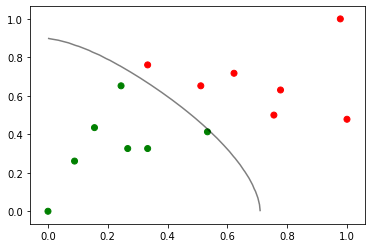

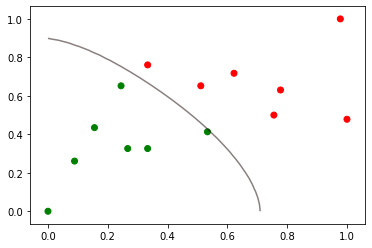

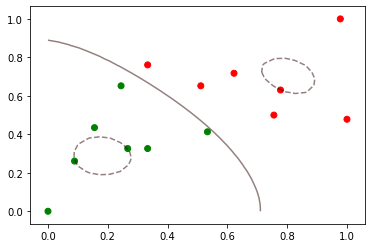

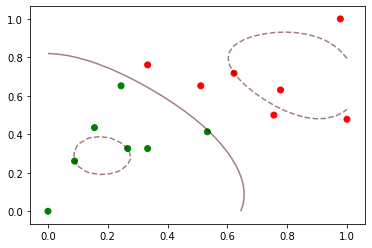

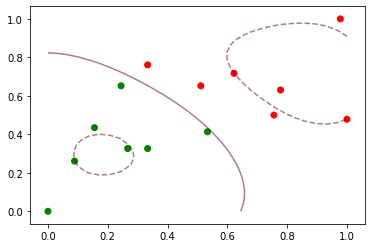

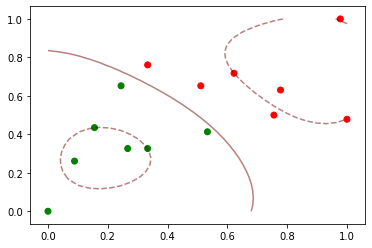

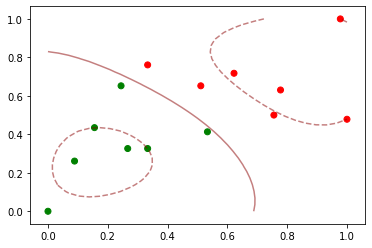

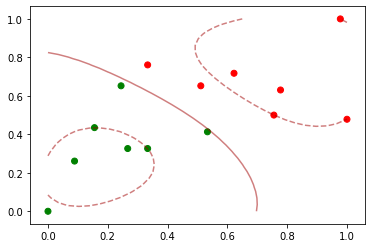

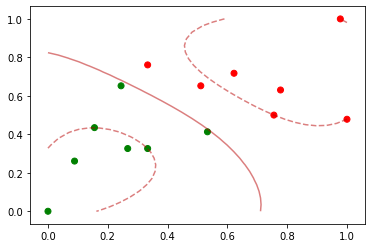

In [41]:
color_value = [0,0,0]
for i in np.arange(0.1, 1, 0.1):
    x_train_after, x_test_after, y_train_after, y_test_after = train_test_split(data_input_after_normalization[['Waga', 'Wzrost']], data_input_after_normalization['Plec'], test_size = 0.2, random_state = 2, shuffle = True)
    clf = SVC(C=i)
    clf.fit(x_train_after, y_train_after)
    y_pred_after = clf.predict(x_test_after)
    compare_df_after = pd.DataFrame(data=y_pred_after,index=[str(i + 1)  
                            for i in range(len(y_pred_after))], columns=["y_pred"])
    compare_df_after['y_test'] = y_test_after.values
    compare_df_after['match'] = np.where((compare_df_after['y_test'] == compare_df_after['y_pred']), True, False)
    print(f'Predicted and test values with normalization\n: {compare_df_after}')
    amount_of_true_after = compare_df_after.groupby('match').size()
    correctness_after = (amount_of_true_after[True]/len(y_test_after)) * 100
    print(f'Amount of correctly predicted after normalization: {correctness_after}')

    plt.figure()
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    plt.scatter(x_train_after['Waga'],x_train_after['Wzrost'], c=y_train_after, cmap=colors.ListedColormap(['red', 'green']))
    ax.contour(XX, YY, Z, colors=color_value, levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    color_value[0] += 0.09

Wnioski:
- dla danego zbioru, ze względu na małą ilość próbek, bardzo dużo zależy od losowania zbioru to treningu. W niektórych przypadkach zmiany są znikome, a dla innych granica decyzyjna jest bardzo niedopasowania
- nie można zastosować C <= 0
- wraz ze wzrostem C, zmniejsza się margines
- najwyższa wartość C powoduje niedokładne ustawianie hiperpłaszczyzny
- powtarzalność testów można wykonać z użyciem "random_state"

### Dla zbioru *dataR2* proszę dokonać podobnej analizy danych. Opis zbioru: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

## Zadanie 5

Proszę zwizualizować dane dla 2 dowolnych zmiennych ze zbioru

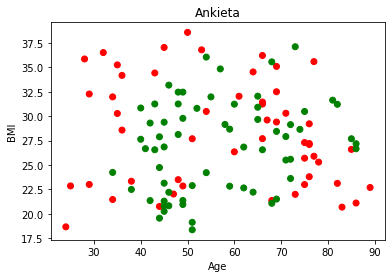

In [42]:
import pandas as pd

data_input = pd.read_csv('./dataR2.csv')
data_input.head()

x = data_input['Classification']
y = data_input['Age']
z = data_input['BMI']

data_input_after = data_input.copy()
plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Ankieta')
plt.show()


## Zadanie 6

Proszę dokonać standaryzacji danych

          Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0    0.369231  0.253850  0.070922  0.004908  0.000000  0.052299     0.221152   
1    0.907692  0.114826  0.226950  0.012190  0.009742  0.052726     0.103707   
2    0.892308  0.235278  0.219858  0.036874  0.022058  0.158526     0.571021   
3    0.676923  0.148328  0.120567  0.014171  0.005911  0.064811     0.151538   
4    0.953846  0.135640  0.226950  0.019936  0.013748  0.027782     0.086940   
..        ...       ...       ...       ...       ...       ...          ...   
111  0.323077  0.419620  0.226950  0.016028  0.011727  0.585897     0.287049   
112  0.584615  0.419125  0.283688  0.037446  0.026441  0.094674     0.543206   
113  0.630769  0.676934  0.262411  0.058863  0.036757  0.664996     0.573988   
114  0.738462  0.357271  0.156028  0.006925  0.004189  0.240191     0.882091   
115  0.953846  0.435950  0.553191  0.311951  0.256680  1.000000     0.342293   

     Resistin     MCP.1  Classification

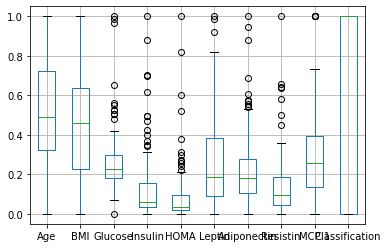

In [43]:

data_input_after['Classification'] = data_input_after['Classification'].map(lambda x: 1 if x == 2 else 0)
scaler = MinMaxScaler()
data_input_after.loc[:, data_input_after.columns != 'Classification'] = scaler.fit_transform(data_input_after.loc[:, data_input_after.columns != 'Classification'])
print(data_input_after)
data_input_after.boxplot()

## Zadanie 7

Trenowanie klasyfikatora. Proszę dokonać treningu klasyfikatora na zbiorze treningowym (X_train, y_train). Proszę użyć różnych wartości parametru C, gamma oraz kernel. Pełna dokumentacja klasyfikatora: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html Wyniki proszę podsumować na odpowiednim wykresie lub tabeli. Test skuteczności klasyfikatora proszę dokonać na zbiorze testowym (X_test, y_test).

In [44]:
from IPython.display import HTML, display

def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>%s</h4><td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

In [45]:
from sklearn.metrics import accuracy_score
from copy import copy

worst_accuracy = 0.99
best_accuracy = 0
X_train, X_test, y_train, y_test = train_test_split(data_input_after.loc[:, data_input_after.columns != 'Classification'], data_input_after['Classification'], test_size = 0.2, random_state = 21, shuffle = True)

table_data = [['C', 'kernel', 'gamma', 'Accuracy']]
for gamma in ['scale', 'auto']:
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        for c in range(0, 30, 5):
            #0 cannot be included in SVC C-value
            if c==0:
                c = c + 1
            clf = SVC(C=c, kernel=kernel, gamma=gamma)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_pred, y_test)
            
            #part for finding worst and best examples
            if accuracy < worst_accuracy:
                worst_accuracy = accuracy
                worst_clf = SVC(C=c, kernel=kernel, gamma=gamma)
                worst_clf.fit(X_train, y_train)
                print(f'{c} {kernel} {gamma} {accuracy}')
            if accuracy >= best_accuracy:
                best_accuracy = accuracy
                best_clf = SVC(C=c, kernel=kernel, gamma=gamma)
                best_clf.fit(X_train, y_train)
                
            table_data.append([c, kernel, gamma, accuracy])


display_table(table_data)

1 linear scale 0.6666666666666666
1 sigmoid scale 0.5
5 sigmoid scale 0.4583333333333333


Wnioski na podstawie obliczeń dokonanych w przykładzie powyżej:
- Bardzo dużo zależy od wylosowanych próbek (tutaj również zastosowano random_state dla zachowania tych samych próbek)
- Dla przejrzystości badanie przeprowadzono tylko na jednym wylosowanym zbiorze
- Dla danego przykładu, gamma='auto' spisuje się dużo gorzej niż gamma='scale' najprawdopobniej dołożenie X.var() do wzoru na gammę powoduje ograniczenie błędu, większą precyzję
- najwyższy wynik został osiągnięty dla kernelu 'poly' i było to ~83%
- porównując kernele, najskuteczniejszymi były poly oraz rbf (biorąc pod uwagę gamma='scale'). Możnaby jeszcze bardziej się zagłębić w te przypadki chociażby ustawiając inny stopień wielomianu dla 'poly'. Najgorszym kernelem okazało się 'sigmoid'.

## Zadanie 8

Należy wyznaczyć macierze pomyłek dla klasyfikatora. Proszę dokonać wizualizacji wraz z kolorami na wykresie. Przykłady: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

<Figure size 432x288 with 0 Axes>

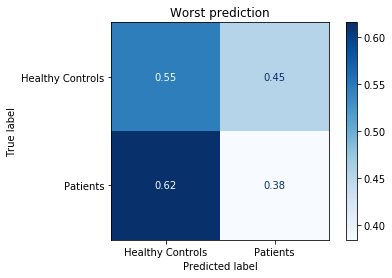

<Figure size 432x288 with 0 Axes>

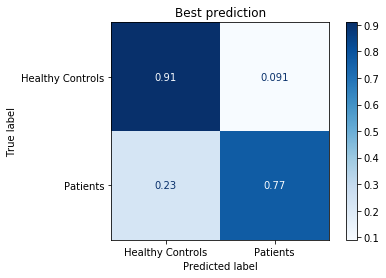

In [46]:
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)
title = 'Worst prediction'
plt.figure()
disp = plot_confusion_matrix(worst_clf, X_test, y_test,
                             display_labels=['Healthy Controls', 'Patients'],
                             cmap=plt.cm.Blues,
                             normalize='true')
disp.ax_.set_title(title)

title = 'Best prediction'
plt.figure()
disp = plot_confusion_matrix(best_clf, X_test, y_test,
                             display_labels=['Healthy Controls', 'Patients'],
                             cmap=plt.cm.Blues,
                             normalize='true')
disp.ax_.set_title(title)
plt.show()